# Homework 3
## BME6938
### Winston Chu
### a) Load dataset

In [1]:
import pandas as pd
import numpy as np

# Read the file and save to a DataFrame
in_file = "HW3Data.csv"
data = pd.read_csv(in_file, header=None)
type(data.shape)

# Display results
print('Matrix dimensions: %s' % (data.shape, ))
data.head()

Matrix dimensions: (62, 2001)


,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


In [2]:
# Separate features from class labels
X = data.loc[:,1:2000].values
y = data.loc[:,0].values
X.shape

(62, 2000)

Apply holdout

In [3]:
from sklearn.model_selection import train_test_split

# Split dataset into test and train sets
#    Chose a test size as 15% of total dataset
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.15,
                     stratify=y,
                     random_state=1)

### b) Feature Selection Calculation

In [4]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
#    The "accuracy" scoring is proportional to the number of correct
#    classifications

#fit model and tune the number of selected features
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features : 51


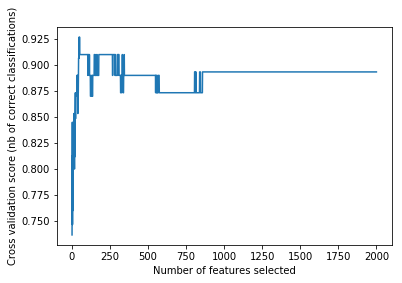

In [5]:
# Output Results
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### c) Calculate performance

In [6]:
# Run on test dataset
y_pred = rfecv.predict(X_test)
# Get score results
performance = rfecv.score(X_test,y_test)
# Output results
print("Performance: ", performance)

Performance:  0.8
